In [1]:
from graph import *
from metrics import *

In [2]:
from scipy.stats import norm

In [3]:
import matplotlib.pyplot as plt

In [4]:
from scipy.optimize import minimize_scalar

In [27]:
class Classifier:
    def __init__(self, ratio, skill, varscale = 1.0):
        self.skill = skill
        self.ratio  = ratio
        self.varscale = varscale

        self.pos = 1 / ratio
        self.neg = 1 - self.pos

        #distribution of Y = 0 (reject) given X (data)
        self.false = lambda x: norm.cdf(x, loc=0.0, scale=varscale)
        #distribution of Y = 1 (accept) given X (data)
        self.true = lambda x: norm.cdf(x, loc=skill, scale=varscale)
        #assume the selectivity we're giving reflects the ratio of the true scores generated
        self.scores = lambda x: self.neg * self.false(x) + self.pos * self.true(x)
        #data accepted given a threshold
        self.accept = lambda x: 1.0 - self.scores(x)
        self.ratio_fn = lambda x: self.accept(x) / self.scores(x)
        #get the data selection threshold
        self.threshold = self.solve_ratio()
        
        self.tn = self.false(self.threshold)
        self.fn = self.true(self.threshold)
        self.tp = (1.0 - self.true(self.threshold))
        self.fp = (1.0 - self.false(self.threshold))

        self.error_matrix = np.array([[self.tn, self.fn], [self.fp, self.tp]])

    def solve_ratio(self):
        opt_fn = lambda x: np.abs(self.ratio - self.ratio_fn(x))
        soln = minimize_scalar(opt_fn, bounds=(0.0, 20.0))
        if soln.success:
            return soln.x
        else:
            print("Solving for classification threshold failed")

In [28]:
s = [1000, 100]

In [29]:
c0 = Classifier(10, 3.0, 1.0)
c1 = Classifier(2, 3.0, 1.0)
c2 = Classifier(1.1, 3.0, 1.0)

In [30]:
c2.pos

0.9090909090909091

In [31]:
c2.neg

0.09090909090909094

In [32]:
zs = np.linspace(-3.0, 6.0, 101)

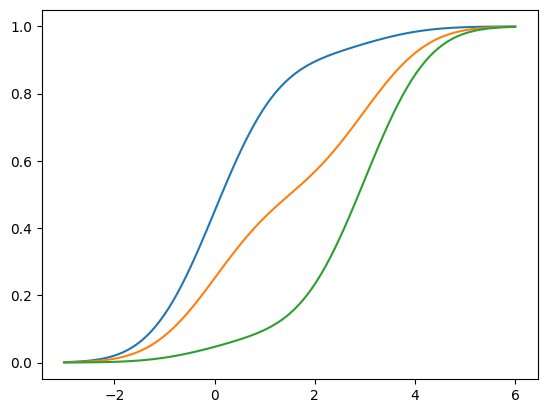

In [33]:
plt.plot(zs, c0.scores(zs))
plt.plot(zs, c1.scores(zs))
plt.plot(zs, c2.scores(zs))

In [34]:
skill = np.linspace(0.0, 6.0, 101)
rat = 100
f1_skill = [f1_score(Classifier(rat, s, 1.0).error_matrix) for s in skill]
recall_skill = [recall(Classifier(rat, s, 1.0).error_matrix) for s in skill]
prec_skill = [precision(Classifier(rat, s, 1.0).error_matrix) for s in skill]

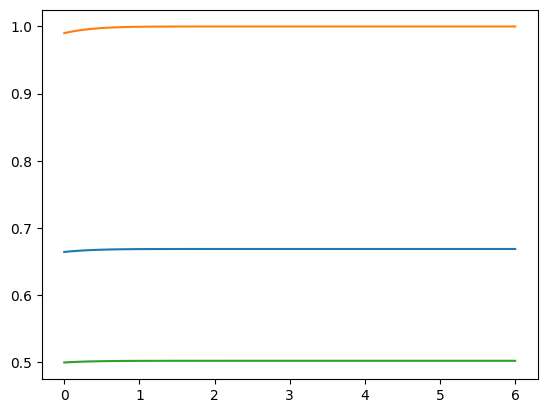

In [35]:
plt.plot(skill, f1_skill)
plt.plot(skill, recall_skill)
plt.plot(skill, prec_skill)

In [36]:
c0.error_matrix

array([[1.01009044e-01, 9.52162329e-06],
       [8.98990956e-01, 9.99990478e-01]])

In [37]:
c1.error_matrix

array([[0.66176534, 0.00490133],
       [0.33823466, 0.99509867]])

In [38]:
c2.error_matrix

array([[0.99751119, 0.4240584 ],
       [0.00248881, 0.5759416 ]])

In [39]:
f1_score(s * c1.error_matrix)

0.3701009026929872

In [40]:
xs = np.linspace(-2, 2, 101)
ems = [Classifier(1.0 + 10**r, 3.0, 1.0).error_matrix for r in xs]

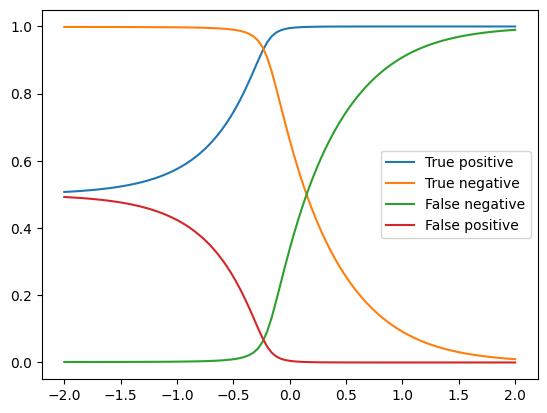

In [41]:
plt.plot(xs, list(map(lambda x: x[1,1], ems)), label="True positive")
plt.plot(xs, list(map(lambda x: x[0,0], ems)), label="True negative")
plt.plot(xs, list(map(lambda x: x[1,0], ems)), label="False negative")
plt.plot(xs, list(map(lambda x: x[0,1], ems)), label="False positive")
plt.legend()

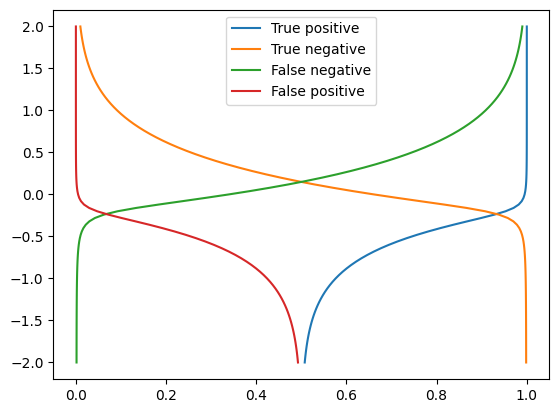

In [42]:
plt.plot( list(map(lambda x: x[1,1], ems)), xs, label="True positive")
plt.plot( list(map(lambda x: x[0,0], ems)), xs, label="True negative")
plt.plot(list(map(lambda x: x[1,0], ems)), xs, label="False negative")
plt.plot(list(map(lambda x: x[0,1], ems)), xs, label="False positive")
plt.legend()

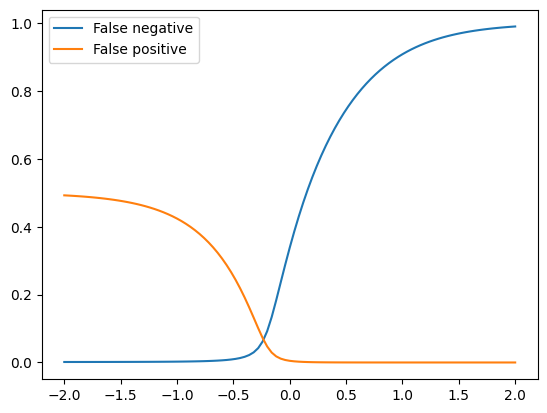

In [43]:
plt.plot(xs, list(map(lambda x: x[1,0], ems)), label="False negative")
plt.plot(xs, list(map(lambda x: x[0,1], ems)), label="False positive")
plt.legend()